<a href="https://colab.research.google.com/github/datasigntist/deeplearning/blob/master/Experiments_with_Convolutions_and_Poolings_using_Sample_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiments with Convolutions and Poolings**

Author : Vishwanathan Raman

EmailId : datasigntist@gmail.com

Description :

This notebook illustrates the concept of Convolutions and Poolings through sample images. The convolution will be applied in the ascent image referenced in scipy and also the Image referenced from https://images.app.goo.gl/9kUt9NJ4YKCymRy88 which is an image of the French window designs. We will apply filters to identify the key features in the image

Reference Links:

Andrew NGs Introduction to Deep Learning and Convolutional Neural Networks

https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF 


The following is an example of Convolution Operation works. Lets assume a matrix 6 by 6 being convolved with a 3 by 3 filter results in 4 by 4 matrix assuming a stride of 1 and a padding of 0. 

Here is the formula for calculating the size of the output matrix

(n+2p-f)/s + 1

In this case n = 6, p = 0, s=1 , f = 3 hence (6+0-3)/1 + 1 = 3 + 1 = 4

If you want the output matrix to be of the same size as input which means you do not want to lose important information embedded in the image then you need to use a padding of

p = (f-1)/2, in which case p = (3-1)/2 = 1

Lets plug in the p to the formula assuming the stride of 1 

(6+2*1-3)/1 + 1 = (8 - 3)/1 + 1 = 5 + 1 = 6


As observed in the sequence, at each step the respective column of the filter is multiplied by the data column also represeted by the same color for easier reference. Once all the data points are computed, the sum of the Output1 is the value of the cell in the new matrix. As each step progresses, there is a stride of 1, always going from left to right.

![alt text](https://github.com/datasigntist/imagesforNotebook/raw/master/Convolution1.png)

![alt text](https://github.com/datasigntist/imagesforNotebook/raw/master/Convolution2.png)

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. 

In [0]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()


Next, we can use the pyplot library to draw the image so we know what it looks like.

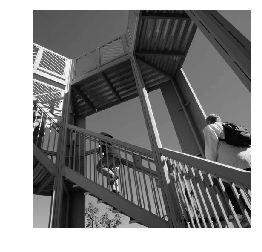

In [0]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

In [0]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print("Size_x",size_x)
print("Size_y",size_y)

Size_x 512
Size_y 512


Now we can create a filter as a 3x3 array. 

In [0]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

# Vertical filter
verticalFilter = np.transpose(np.array([[1,1,1], [0, 0, 0], [-1, -1, -1]]))
print('Vertical Filter\n',verticalFilter)

# Horizontal filter
horizontalFilter = np.array([[1,1,1], [0, 0, 0], [-1, -1, -1]])
print('Horizontal Filter\n',horizontalFilter)

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Vertical Filter
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Horizontal Filter
 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [0]:
def applyFilterOnGrayScaleImage(filter, i):
  # As shown in the course
  i_transformed = np.copy(i)
  size_x = i_transformed.shape[0]
  size_y = i_transformed.shape[1]
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[1][0])
        convolution = convolution + (i[x + 1, y-1] * filter[2][0])
        convolution = convolution + (i[x-1, y] * filter[0][1])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[2][1])
        convolution = convolution + (i[x-1, y+1] * filter[0][2])
        convolution = convolution + (i[x, y+1] * filter[1][2])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        i_transformed[x, y] = convolution
        
  # Plot the image. Note the size of the axes -- they are 512 by 512
  plt.gray()
  plt.grid(False)
  plt.imshow(i_transformed)
  #plt.axis('off')
  plt.show()  
  return i_transformed

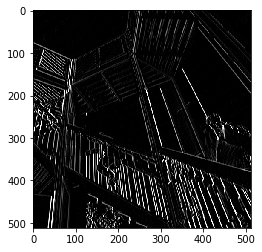

In [0]:
# Effects of applying vertical filter, shows the vertical edges
i_transformed = applyFilterOnGrayScaleImage(verticalFilter,i)

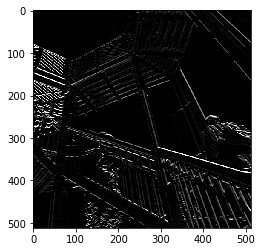

In [0]:
# Effects of applying horizontal filter, shows the horizontal edges
i_transformed = applyFilterOnGrayScaleImage(horizontalFilter,i)

The following representation gives an overview of how pooling works. The objective of pooling is to reduce the size of the image. There are 2 methods MAX or AVG. In general MAX is more adopted than the AVG. Assuming you have an image of size 4 by 4 and a pooling is applied through a filter by 2 by 2, the resulting output is 2 by 2.

The formula for determining the size of the output is (n-f)/s+1 where n is the size, f is the filer and s is stride. Assuming a stride of 2 and applying the formula to the above sequence yields

n=4, f=2 and s=2

(n-f)/s+1= (4-2)/2+1= 2/2+1= 2

In general it can be observed that size of the filter is same as the stride

![alt text](https://github.com/datasigntist/imagesforNotebook/raw/master/Pooling.png)

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

In [0]:
def applyPoolingOnGrayScaleImage(poolingSize,img):
  size_x = img.shape[0]
  size_y = img.shape[1]
  new_x = int(size_x/poolingSize)
  new_y = int(size_y/poolingSize)
  newImage = np.zeros((new_x, new_y))
  for x in range(0, size_x, poolingSize):
    for y in range(0, size_y, poolingSize):
      pixels = []
      pixels.append(img[x, y])
      pixels.append(img[x+1, y])
      pixels.append(img[x, y+1])
      pixels.append(img[x+1, y+1])
      newImage[int(x/poolingSize),int(y/poolingSize)] = max(pixels)

  # Plot the image. Note the size of the axes -- now 256 pixels instead of 512
  plt.gray()
  plt.grid(False)
  plt.imshow(newImage)
  #plt.axis('off')
  plt.show()
  return newImage

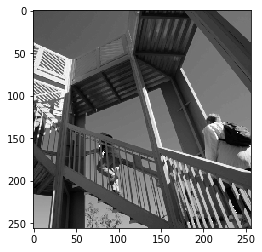

The size of the image after pooling is (256, 256)


In [0]:
pooledImage = applyPoolingOnGrayScaleImage(2,i)
print('The size of the image after pooling is',pooledImage.shape)

This code will show a (4, 4) pooling. As you can observe as the size of the image shrinks the details in the image get blurred.

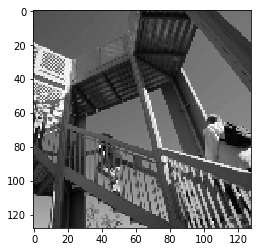

The size of the image after pooling is (128, 128)


In [0]:
pooledImage = applyPoolingOnGrayScaleImage(4,i)
print('The size of the image after pooling is',pooledImage.shape)

This code will show a (8,8) pooling. As you can observe as the size of the image shrinks the details in the image get blurred. The blurring with 8 by 8 pooling is more prominent than 4 by 4.

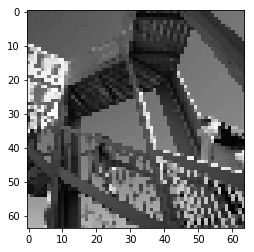

The size of the image after pooling is (64, 64)


In [0]:
pooledImage = applyPoolingOnGrayScaleImage(8,i)
print('The size of the image after pooling is',pooledImage.shape)

Lets upload this image https://images.app.goo.gl/9kUt9NJ4YKCymRy88 into the colab evnironment and apply the filters. The filters when applied on this image shows more prominently the vertical and horizontal edges. The window shown in the image has distinctive horizontal and vertical lines. This becomes more apparent after the application of the filter.

In [0]:
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    print(im_data.shape)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

Saving Frenchdoors.jpg to Frenchdoors.jpg
(720, 1280, 3)


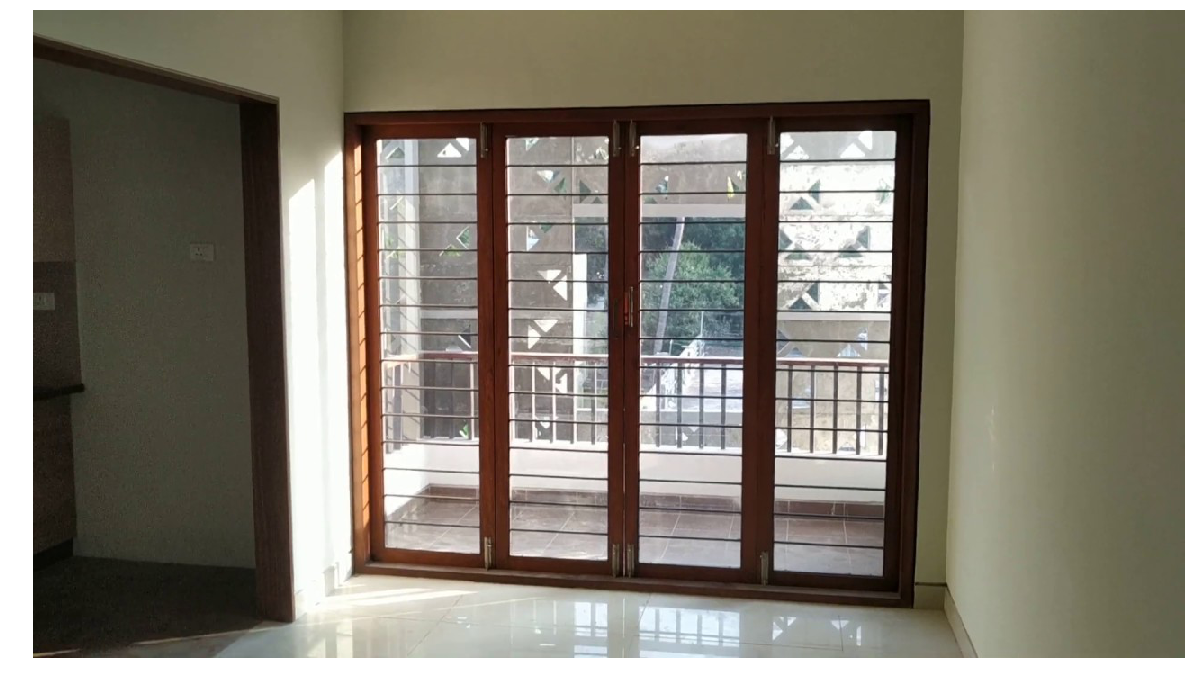

In [0]:
# Here's a codeblock just for fun. You should be able to upload an image here 
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  display_image_in_actual_size(path)

In [0]:
im_data = plt.imread('/content/Frenchdoors.jpg')
im_data_transformed = np.copy(im_data)
size_x = im_data_transformed.shape[0]
size_y = im_data_transformed.shape[1]
print("Size_x",size_x)
print("Size_y",size_y)
print("Weight",weight)

Size_x 720
Size_y 1280
Weight 1


In [0]:
def applyFilterOnRGBImage(filter, im_data):
  im_data_transformed = np.copy(im_data)
  size_x = im_data_transformed.shape[0]
  size_y = im_data_transformed.shape[1]
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (im_data[x - 1, y-1] * filter[0][0])
        convolution = convolution + (im_data[x, y-1] * filter[1][0])
        convolution = convolution + (im_data[x + 1, y-1] * filter[2][0])
        convolution = convolution + (im_data[x-1, y] * filter[0][1])
        convolution = convolution + (im_data[x, y] * filter[1][1])
        convolution = convolution + (im_data[x+1, y] * filter[2][1])
        convolution = convolution + (im_data[x-1, y+1] * filter[0][2])
        convolution = convolution + (im_data[x, y+1] * filter[1][2])
        convolution = convolution + (im_data[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution[0]<0):
          convolution[0]=0
        if(convolution[0]>255):
          convolution[0]=255
        if(convolution[1]<0):
          convolution[1]=0
        if(convolution[1]>255):
          convolution[1]=255
        if(convolution[2]<0):
          convolution[2]=0
        if(convolution[2]>255):
          convolution[2]=255        
        im_data_transformed[x, y][0] = convolution[0]
        im_data_transformed[x, y][1] = convolution[1]
        im_data_transformed[x, y][2] = convolution[2]
  displayImage(im_data_transformed)


In [0]:
def displayImage(im_data_transformed):
  dpi = 80
  height, width, depth = im_data_transformed.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(im_data_transformed, cmap='gray')

  plt.show()

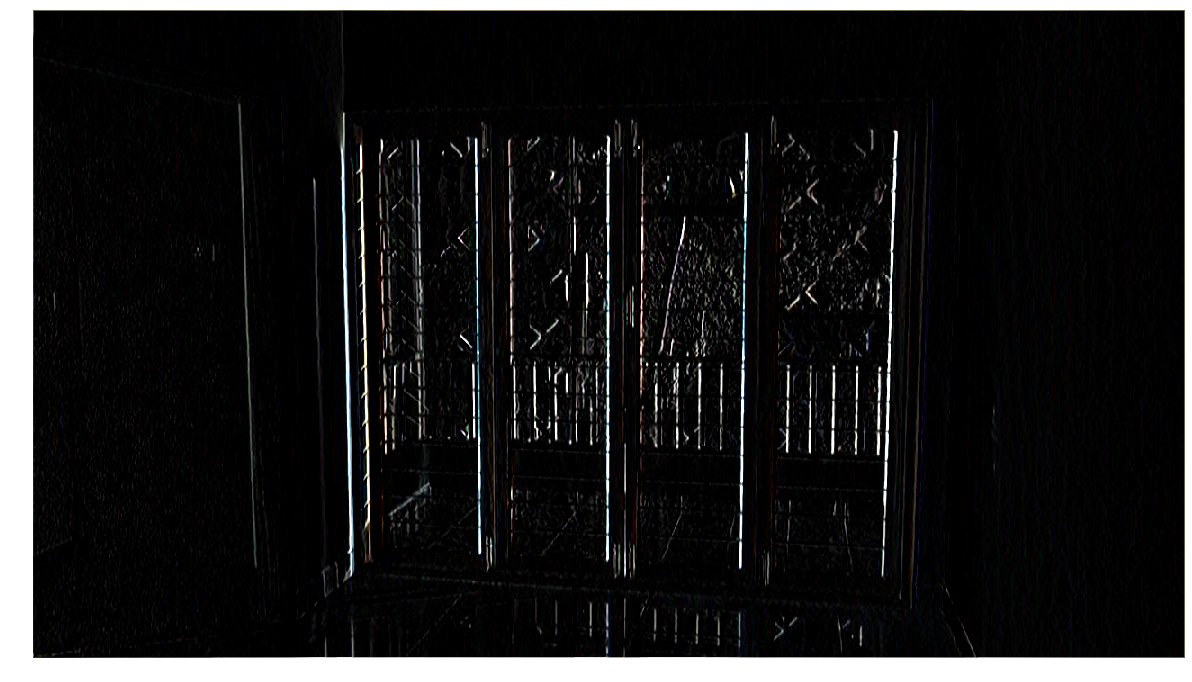

In [0]:
im_data = plt.imread('/content/Frenchdoors.jpg')
applyFilterOnRGBImage(verticalFilter,im_data)

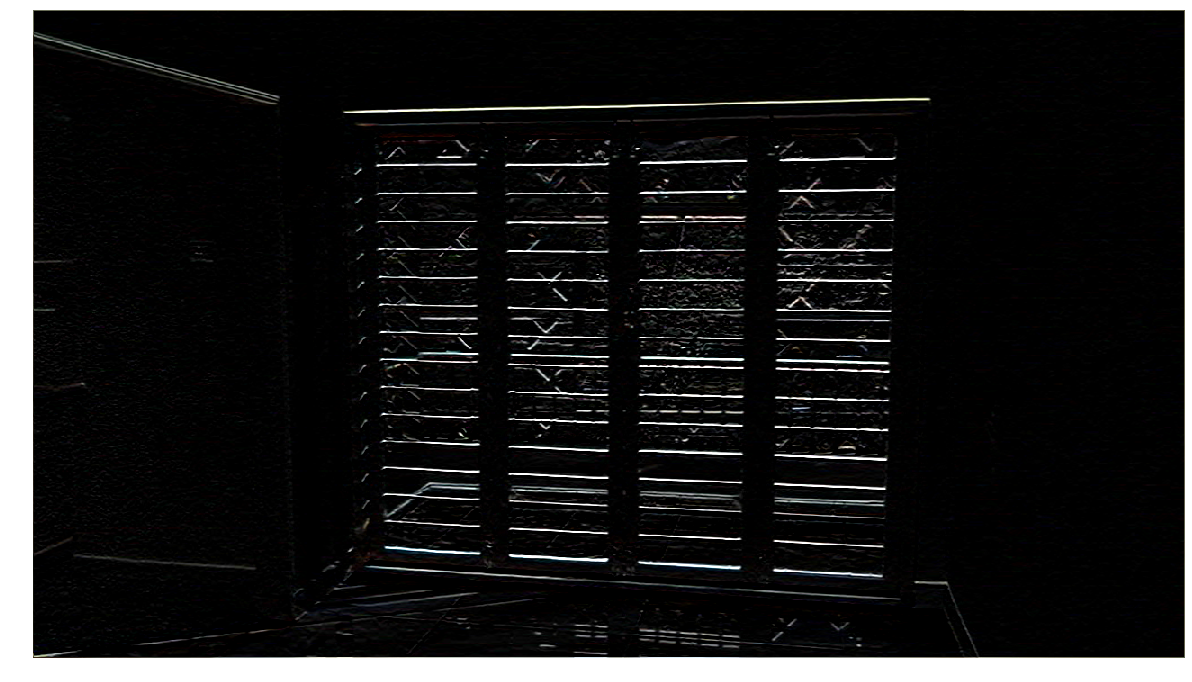

In [0]:
im_data = plt.imread('/content/Frenchdoors.jpg')
applyFilterOnRGBImage(horizontalFilter,im_data)

In [0]:
#Commands to see the contents of the content directory and remove the image
#!ls /content
#!rm /content/'Frenchdoors.jpeg'